In [140]:
library(tidyverse)
library(plotly)
library(maps)
library(rbokeh)
library(widgetframe)
library(htmlwidgets)

In [2]:
df <- read_csv("Tweets.csv")
dim(df)

Parsed with column specification:
cols(
  tweet_id = col_double(),
  airline_sentiment = col_character(),
  airline_sentiment_confidence = col_double(),
  negativereason = col_character(),
  negativereason_confidence = col_double(),
  airline = col_character(),
  airline_sentiment_gold = col_character(),
  name = col_character(),
  negativereason_gold = col_character(),
  retweet_count = col_integer(),
  text = col_character(),
  tweet_coord = col_character(),
  tweet_created = col_character(),
  tweet_location = col_character(),
  user_timezone = col_character()
)


[1] 14640    15

## **Are there any NAs ??**

In [55]:
apply(df, 2, function(x) sum(is.na(x)))

tweet_id            airline_sentiment 
                           0                            0 
airline_sentiment_confidence               negativereason 
                           0                         5462 
   negativereason_confidence                      airline 
                        4118                            0 
      airline_sentiment_gold                         name 
                       14600                            0 
         negativereason_gold                retweet_count 
                       14608                            0 
                        text                  tweet_coord 
                           0                        13621 
               tweet_created               tweet_location 
                           0                         4733 
               user_timezone 
                        4820

## **Whats in the sentiment!**
Lets start off with some simple analysis of the variables other than the text. We look at how the sentiments are structured.

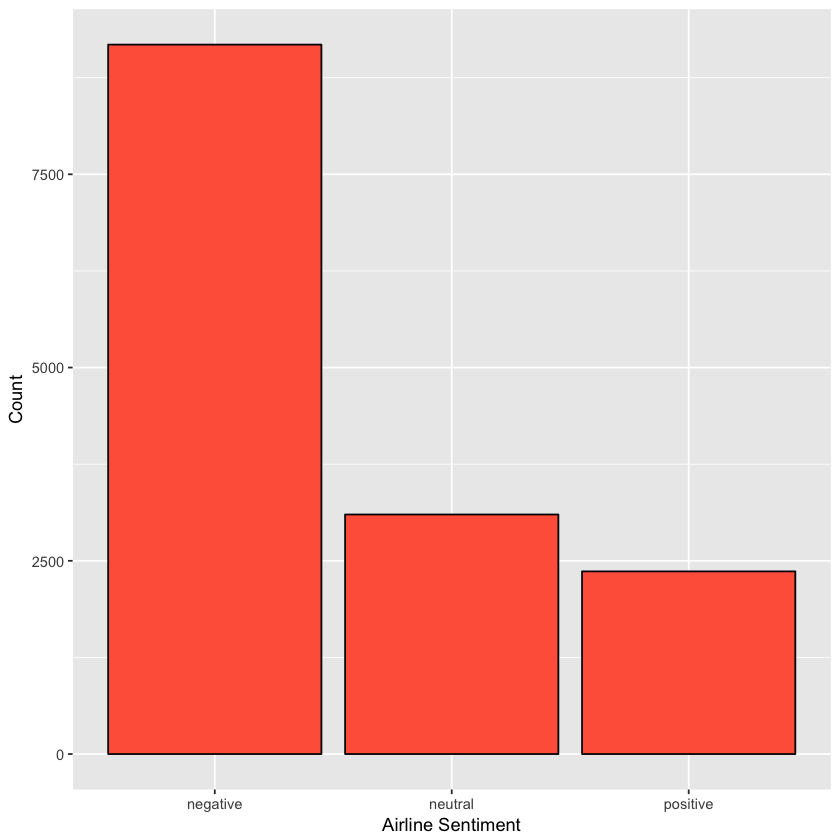

In [25]:
df %>%
ggplot(aes(airline_sentiment))+
geom_bar(fill = "tomato", color = "black")+
labs(x = "Airline Sentiment", y = "Count")

We seem to have more tweets with negative sentiment in our database

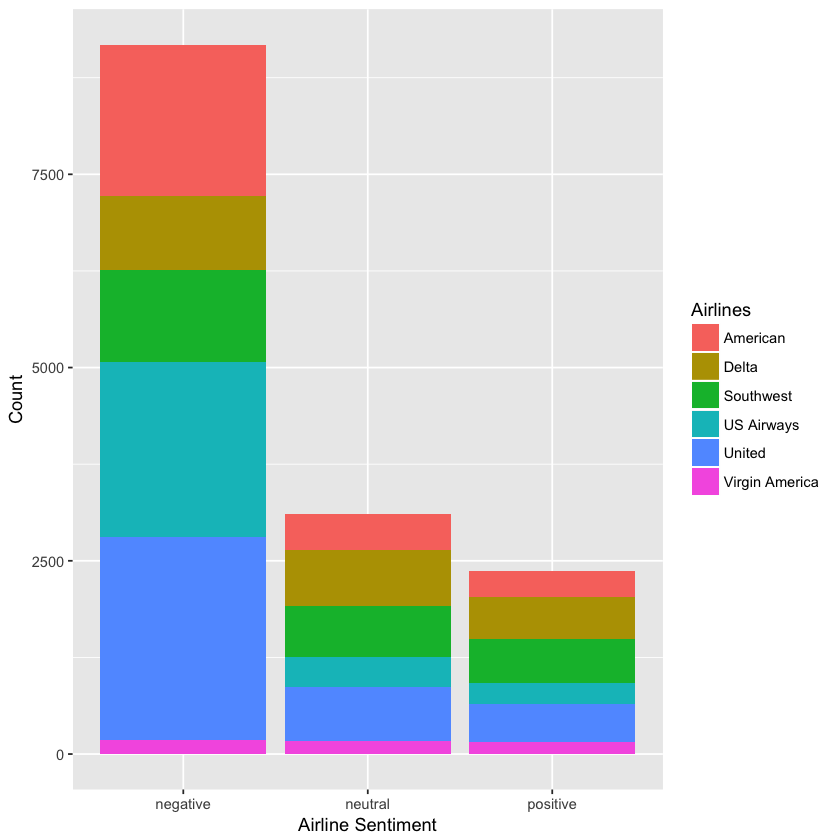

In [62]:
df %>%
ggplot(aes(airline_sentiment))+
geom_bar(aes(fill = airline))+
labs(x = "Airline Sentiment", y = "Count", fill = "Airlines")

Among the negative sentiments, United Airlines has the most of them! In positive sentiment Delta and Southwest have almost equal and large proportion of positive ratings.

## **Number of tweets per airline**

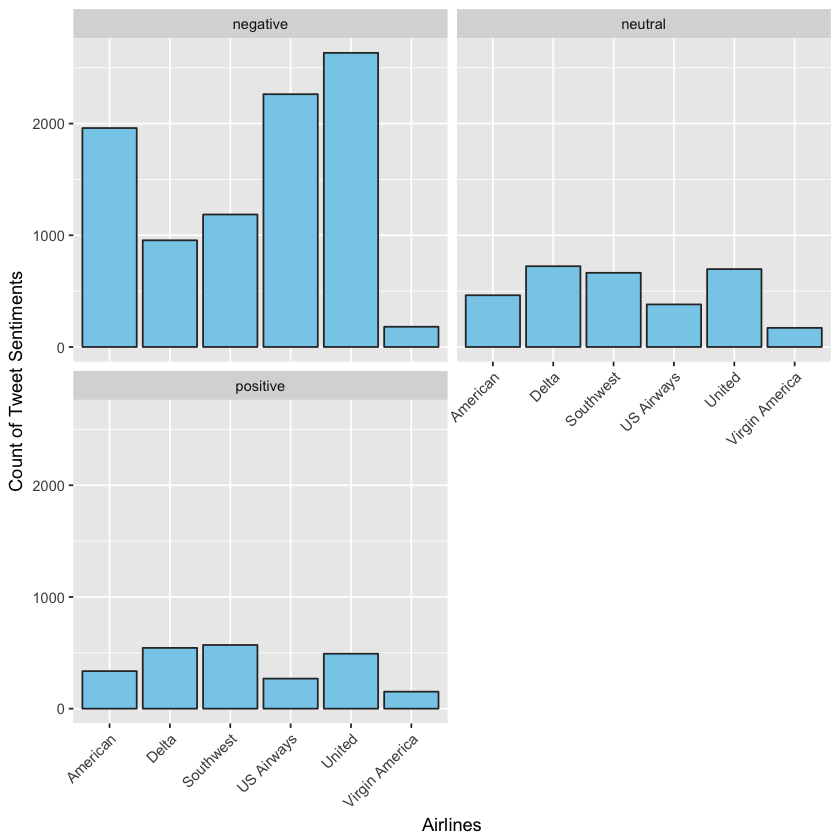

In [47]:
df %>%
count(airline, airline_sentiment) %>%
ggplot(aes(airline, n))+
geom_bar(stat = "identity", colour = "grey19", fill = "skyblue")+
facet_wrap(~airline_sentiment, ncol = 2)+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))+
labs(x = "Airlines", y = "Count of Tweet Sentiments")

The above plot helps use get a better overview of the number of tweets of each type for the airlines and it is more revealing too. We see that there are more negative tweets in our database. Also, United Airlines, US-Airways and American Airlines have large negative ratings. Among positive ratings, Southwest and Delta have high positve ones. Lets also look at each airline combined.

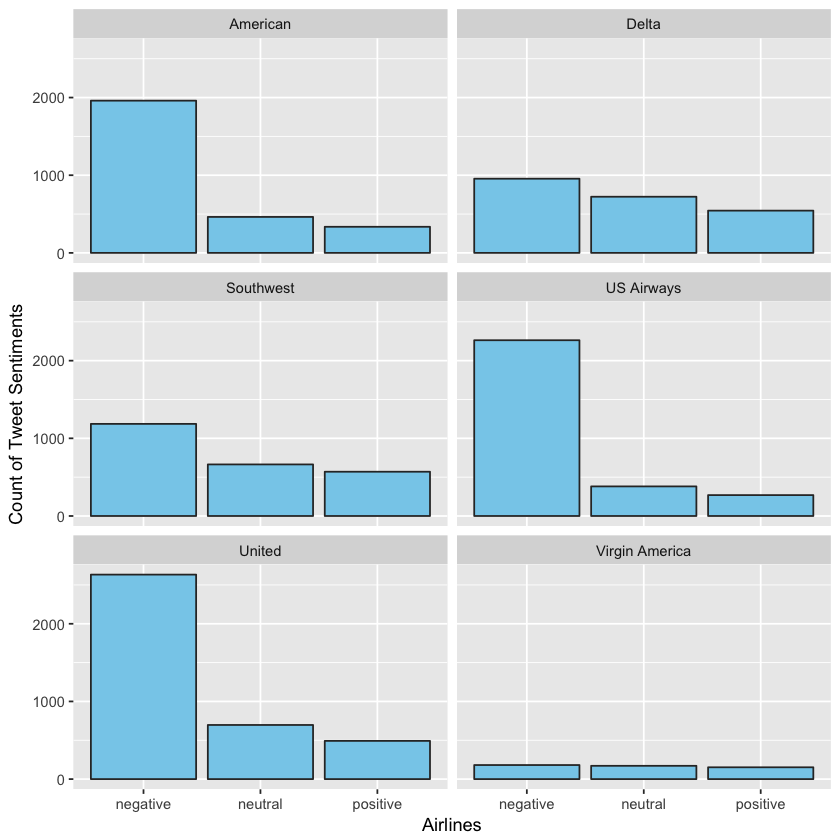

In [52]:
df %>%
count(airline, airline_sentiment) %>%
ggplot(aes(airline_sentiment, n))+
geom_bar(stat = "identity", colour = "grey19", fill = "skyblue")+
facet_wrap(~airline, ncol = 2)+
labs(x = "Airlines", y = "Count of Tweet Sentiments")

This shows that all airlines except Virgin America have more negative tweets than positive and neutral ones.

## **Airline sentiment confidence**

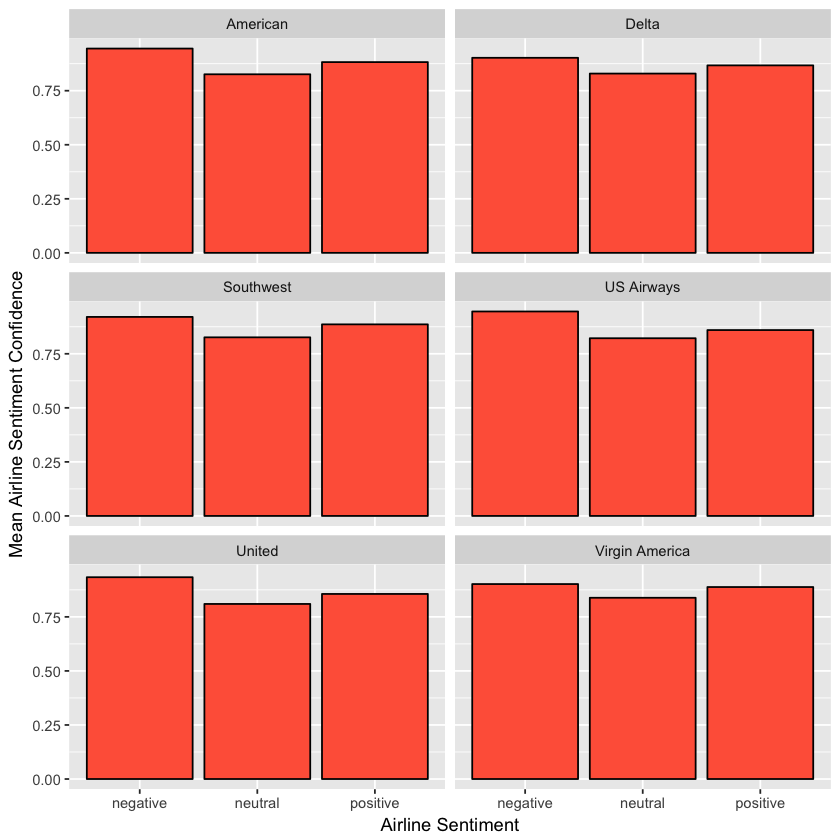

In [53]:
df %>%
group_by(airline, airline_sentiment) %>%
summarise(
    mean_airline_sentiment = mean(airline_sentiment_confidence, na.rm = TRUE)
) %>%
ggplot(aes(airline_sentiment, mean_airline_sentiment))+
geom_bar(stat = "identity", fill = "tomato", color = "black")+
facet_wrap(~airline, ncol = 2)+
labs(x = "Airline Sentiment", y = "Mean Airline Sentiment Confidence")

It seems all airlines have almost identical graphs when it comes to the mean airline sentiment confidence. Not much can be gauged from the above plot except that people have higher confidence in their negative sentiment for all the airlines.

## **Reasons for negative ratings**
First, lets again plot a simple graphs to see the count of the negative reasons irrespective of the airlines

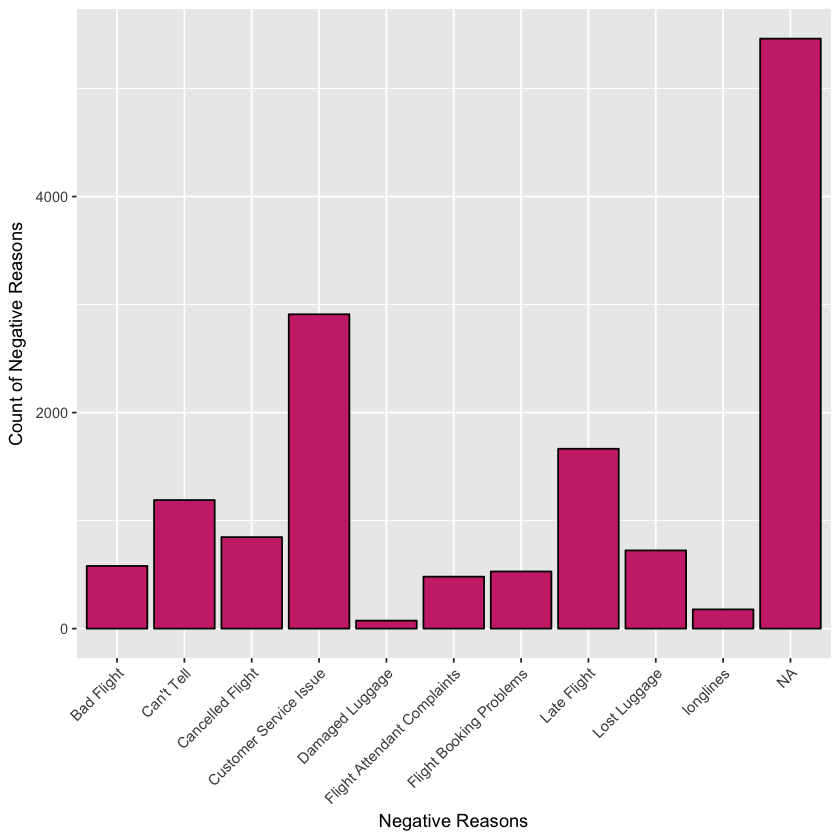

In [106]:
df %>%
ggplot(aes(negativereason))+
geom_bar(fill = "violetred3", color = "black")+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))+
labs(x = "Negative Reasons", y = "Count of Negative Reasons")

It seems we have lots of NA in negative reasons. Lets remove it and again plot the graph.

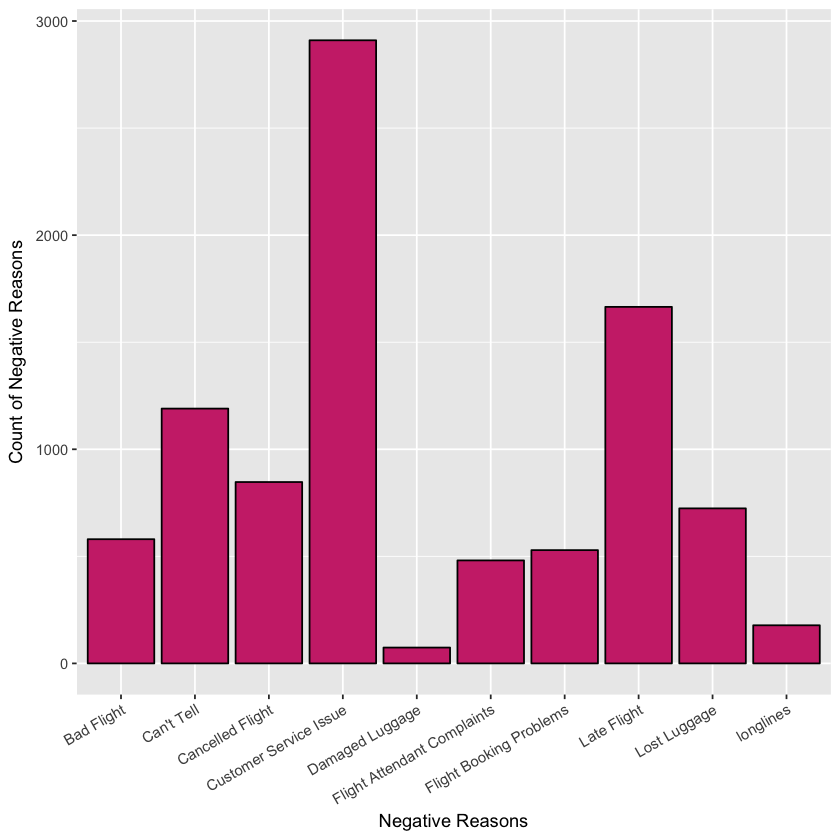

In [107]:
df %>%
filter(!is.na(negativereason)) %>%
ggplot(aes(negativereason))+
geom_bar(fill = "violetred3", color = "black")+
theme(axis.text.x = element_text(angle = 30, hjust = 1, size = 9))+
labs(x = "Negative Reasons", y = "Count of Negative Reasons")

Bad Customer Service seems to be the largest cause of concern among the people followed by Late Flight. A significant percentage of people can not even tell what the problem is.

## **Airlines and their respective negative reasons**

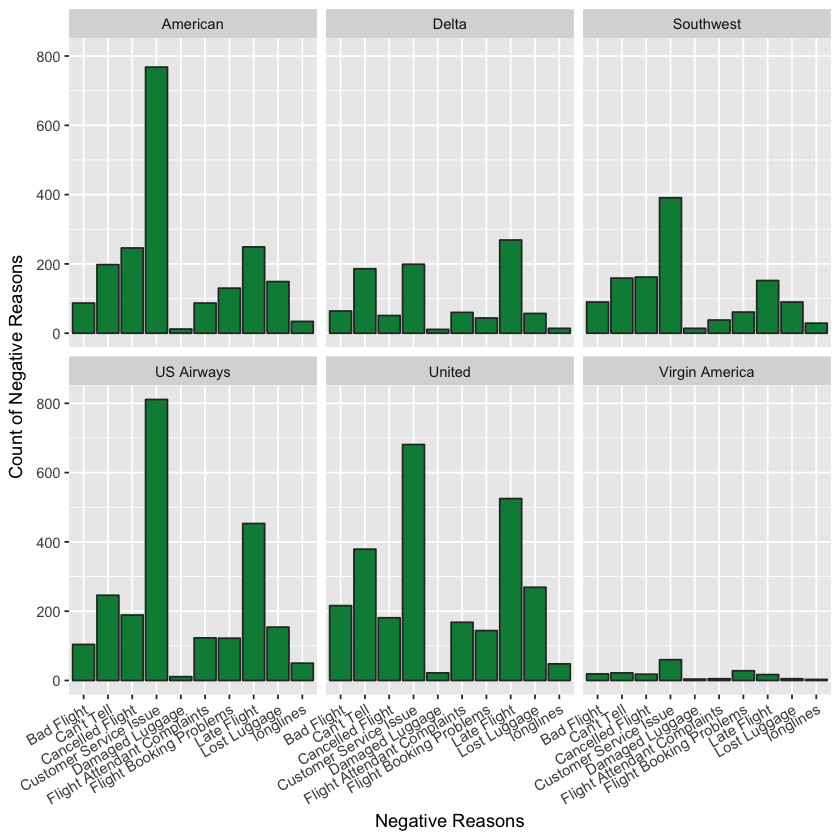

In [77]:
df %>%
filter(!is.na(negativereason)) %>%
count(airline, negativereason) %>%
ggplot(aes(negativereason, n))+
geom_bar(stat = "identity", colour = "grey19", fill = "springgreen4")+
facet_wrap(~airline, ncol = 3)+
theme(axis.text.x = element_text(angle = 30, hjust = 1, size = 9))+
labs(x = "Negative Reasons", y = "Count of Negative Reasons")

This reveals a lot about where the individual flights lack. American, US, United and Southwest Airlines seem to have large customer service issues. Delta airlines on the other hand face problems due to lost luggage. It seems that Virgin America has very very less negative tweets. This may be because we dont have enough of it's data points in our data or it really is very satisfying to people. United Airlines in general have high bars in many negative reasons.
Lets look at how the airlines fare when grouped by the negative reasons

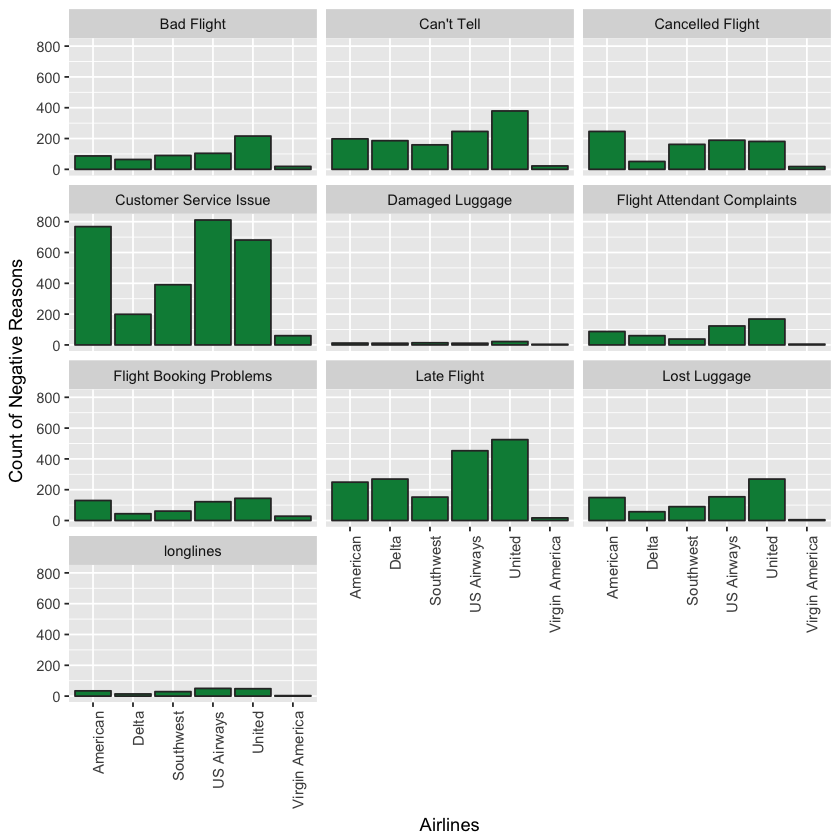

In [81]:
df %>%
filter(!is.na(negativereason)) %>%
count(airline, negativereason) %>%
ggplot(aes(airline, n))+
geom_bar(stat = "identity", colour = "grey19", fill = "springgreen4")+
facet_wrap(~negativereason, ncol = 3)+
theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 9))+
labs(x = "Airlines", y = "Count of Negative Reasons")

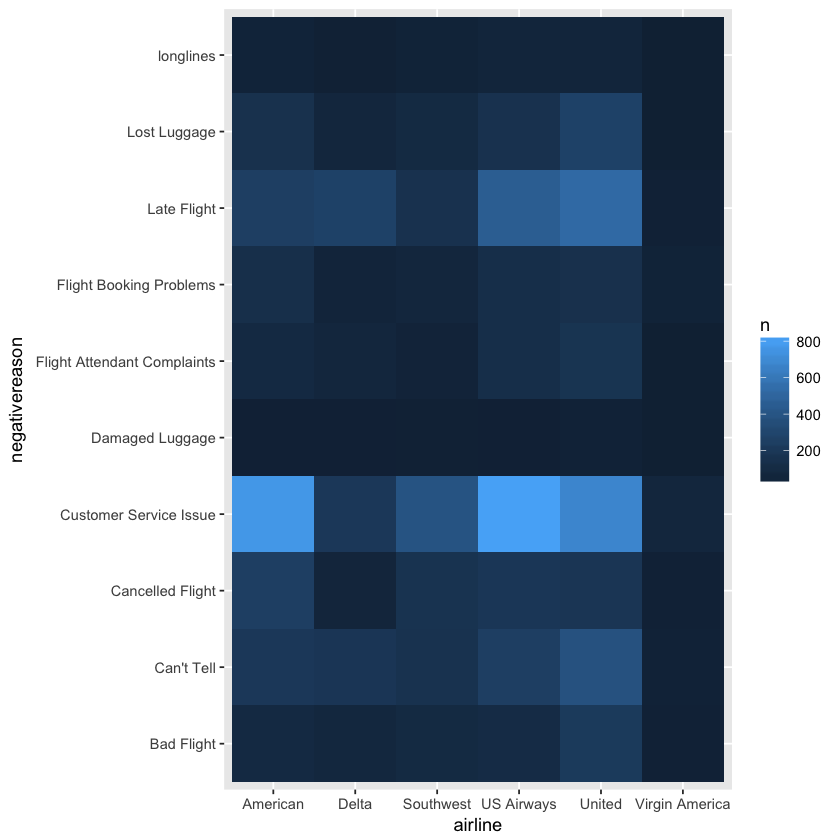

In [111]:
df %>%
filter(!is.na(negativereason)) %>%
count(airline, negativereason) %>%
ggplot(aes(airline, negativereason))+
geom_tile(aes(fill = n))

## **Confidence in negative reason**

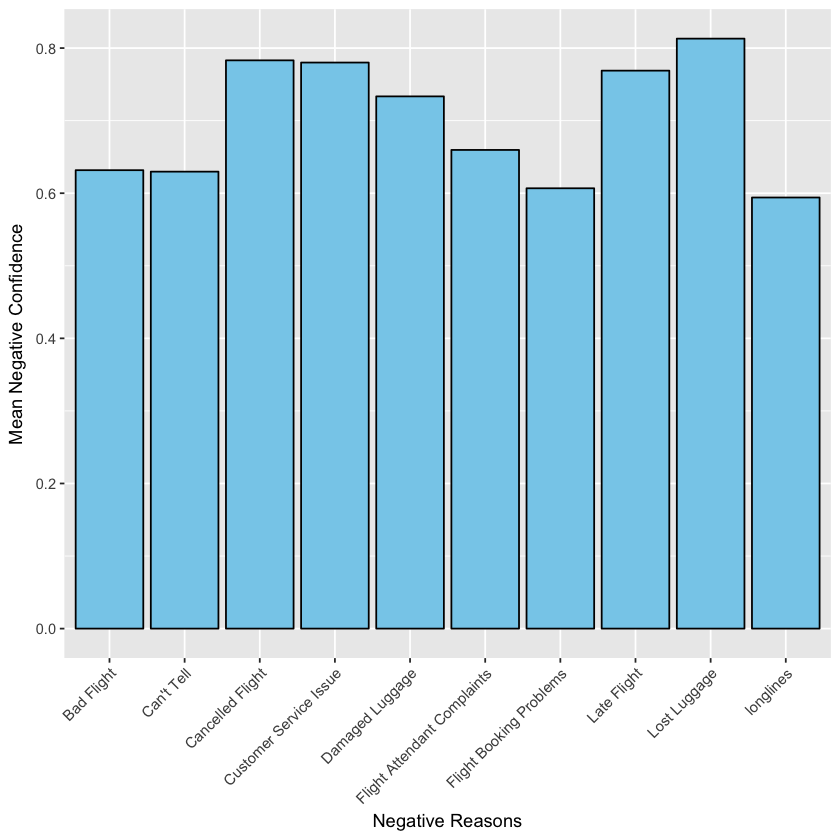

In [98]:
df %>%
filter(!is.na(negativereason)) %>%
group_by(negativereason) %>%
summarise(
    mean_confidence = mean(negativereason_confidence, na.rm = TRUE)
) %>%
ggplot(aes(negativereason, mean_confidence))+
geom_bar(stat = "identity", color = "black", fill = "skyblue")+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))+
labs(x = "Negative Reasons", y = "Mean Negative Confidence")

We see that people have a generally higher confidence when it comes to lost luggage. This is followed by cancelled flight and customer service issues

## **Negative reason confidence and airlines**

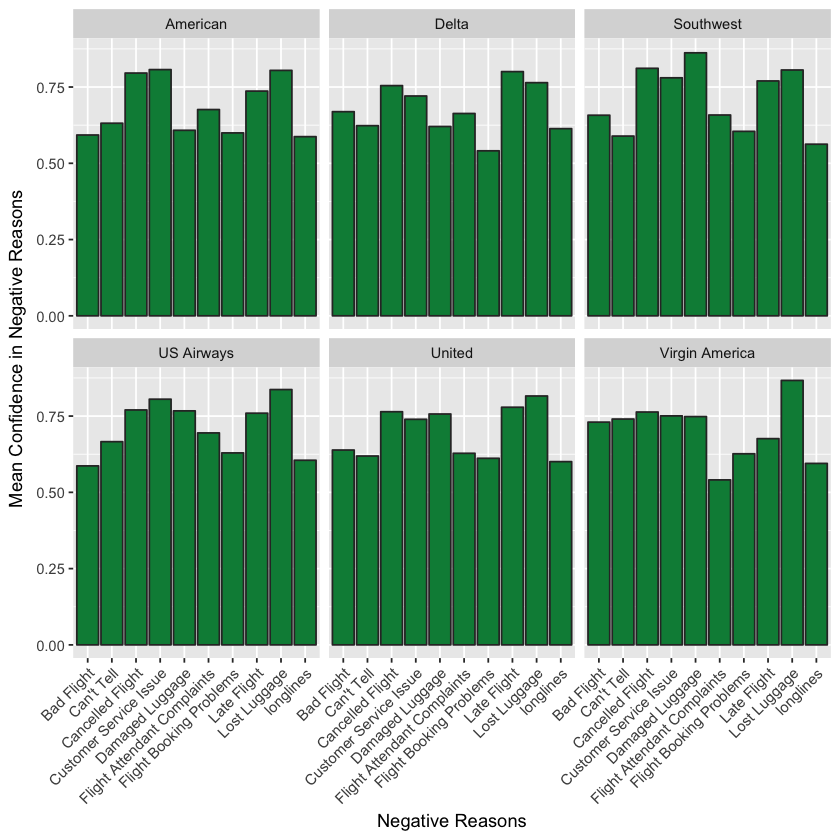

In [105]:
df %>%
filter(!is.na(negativereason)) %>%
group_by(airline, negativereason) %>%
summarise(
    mean_confidence = mean(negativereason_confidence, na.rm = TRUE)
) %>%
ggplot(aes(negativereason, mean_confidence))+
geom_bar(stat = "identity", colour = "grey19", fill = "springgreen4")+
facet_wrap(~airline, ncol = 3)+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))+
labs(x = "Negative Reasons", y = "Mean Confidence in Negative Reasons")

## **Number of retweets**

In [109]:
df %>%
group_by(airline_sentiment) %>%
summarise(
    number_of_retweets = sum(retweet_count, na.rm = TRUE)
)

airline_sentiment number_of_retweets
1 negative          857               
2 neutral           189               
3 positive          164

It seems people tend to retweet more about negative experiences than positive an neutral ones

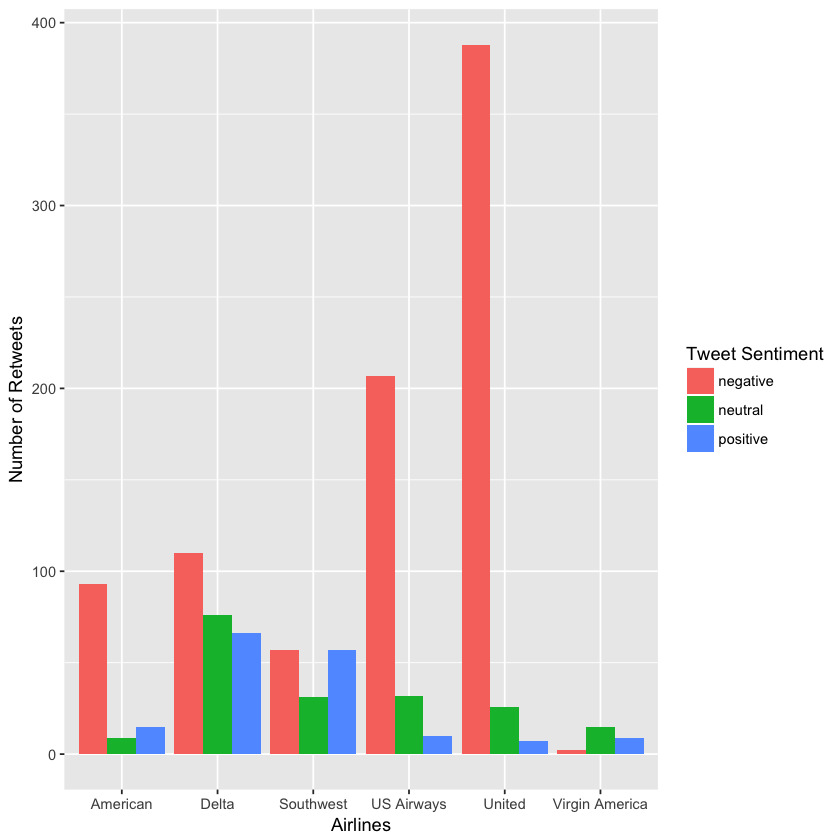

In [118]:
df %>%
group_by(airline, airline_sentiment) %>%
summarise(
    number_of_tweets = sum(retweet_count, na.rm = TRUE)
) %>%
ggplot(aes(airline, number_of_tweets))+
geom_bar(aes(fill = airline_sentiment), stat = "identity", position = "dodge")+
labs(x = "Airlines", y = "Number of Retweets", fill = "Tweet Sentiment")

It seems that most people are negative about United Airlines and US-Airways. On the other hand, people are more neutral and positive about Virgin American.

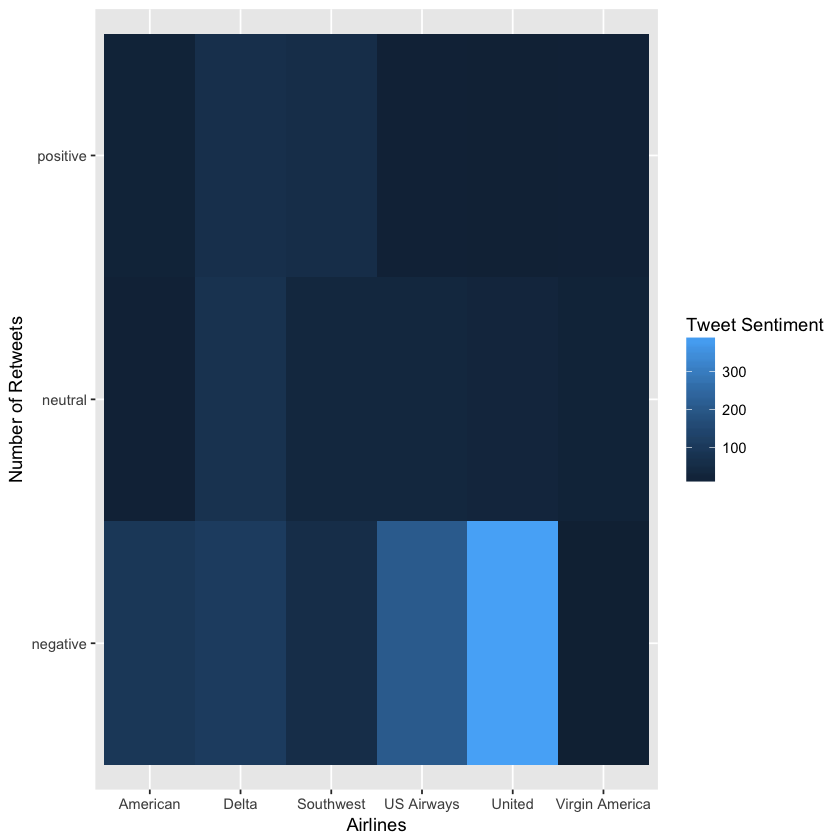

In [122]:
df %>%
group_by(airline, airline_sentiment) %>%
summarise(
    number_of_tweets = sum(retweet_count, na.rm = TRUE)
) %>%
ggplot(aes(airline, airline_sentiment))+
geom_tile(aes(fill = number_of_tweets))+
labs(x = "Airlines", y = "Number of Retweets", fill = "Tweet Sentiment")

Since United Airways have the most negative retweets, we look at what was the distribution of the retweets with respect to the negative reasons

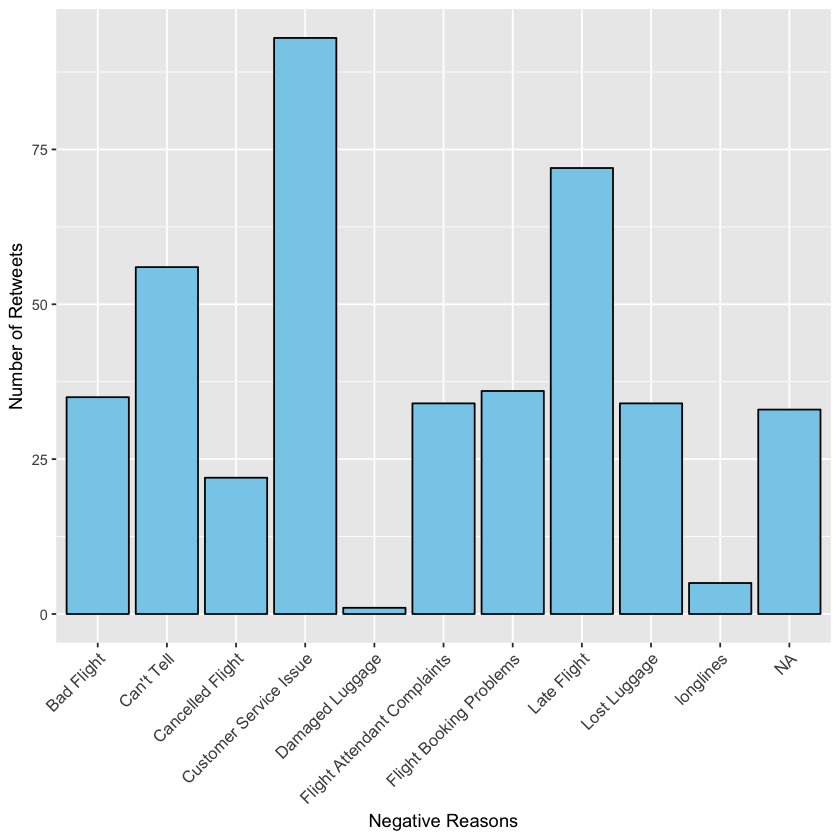

In [129]:
df %>%
filter(airline == "United") %>%
group_by(negativereason) %>%
summarise(
    n_retweets = sum(retweet_count, na.rm = TRUE)
) %>%
ggplot(aes(negativereason, n_retweets))+
geom_bar(stat = "identity", fill = "skyblue", color = "black")+
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))+
labs(x = "Negative Reasons", y = "Number of Retweets")

## **Tweet locations**

In [188]:
location = df$tweet_coord
location = location[!is.na(location)]
location = as_tibble(location)
location = select(location, location = value)
location$location = as.character(location$location)

In [195]:
location_2 <- location %>%
filter(location != "[0.0, 0.0]") %>%
count(location)

In [214]:
location_coords = strsplit(location_2$location, ',')

lat = NULL
long = NULL
for (i in 1:length(location_coords)) {
    lat = c(lat, substring(location_coords[[i]][1], 2)) # removes first character which is [
    long = c(long, location_coords[[i]][2]) 
}

location_2$lat <- lat
location_2$long = long

In [216]:
# remove ]
location_2$long = substr(location_2$long, 1, nchar(location_2$long)-1)

location_2$lat = as.numeric(location_2$lat)
location_2$long = as.numeric(location_2$long)

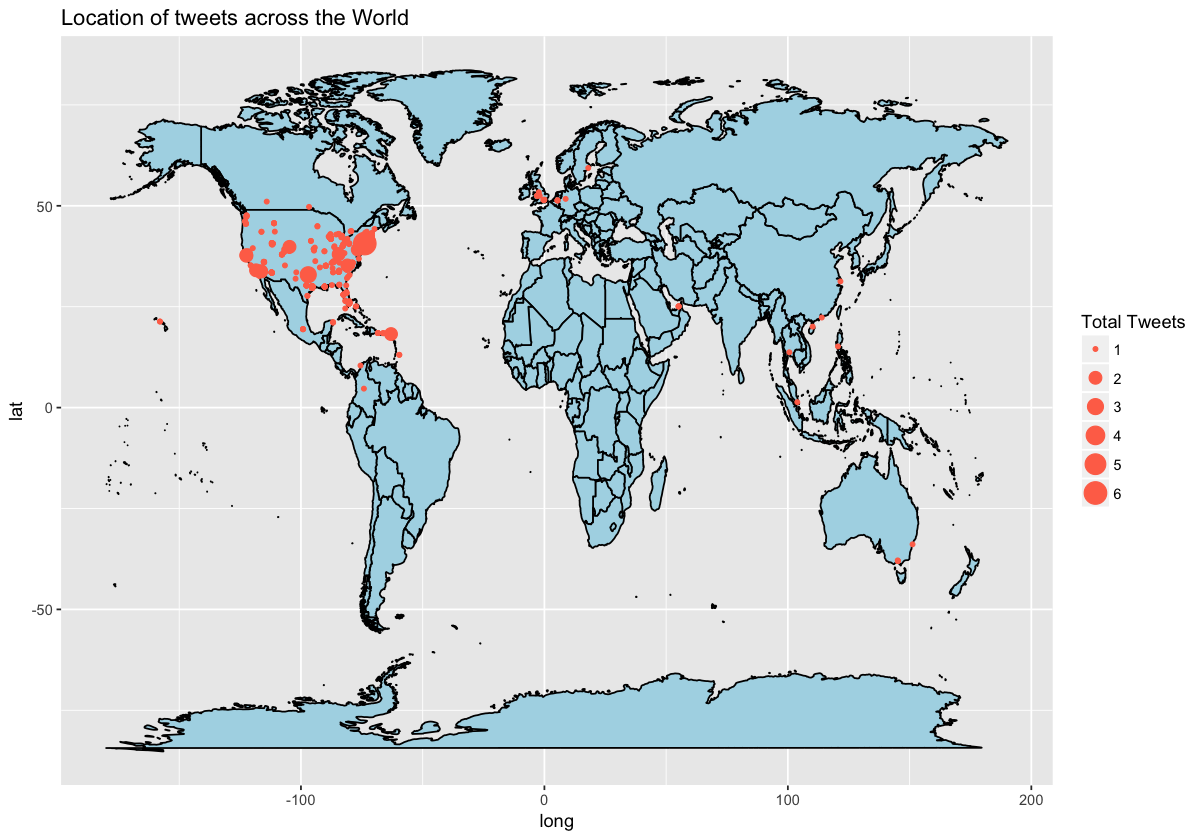

In [228]:
options(repr.plot.width = 10, repr.plot.height = 7)
require(maps)
world_map <- map_data("world")
ggplot()+
geom_polygon(data = world_map, aes(x = long, y = lat, group = group), colour="black", fill = 'lightblue')+ 
ggtitle("Location of tweets across the World")+
geom_point(data = location_2, aes(x = long, y = lat, size = n), color="coral1") + scale_size(name="Total Tweets")

We see that almost all the tweets are centered in USA and Canada. Lets dig deeper into these regions to see where

Warning message:
“Removed 56 rows containing missing values (geom_point).”

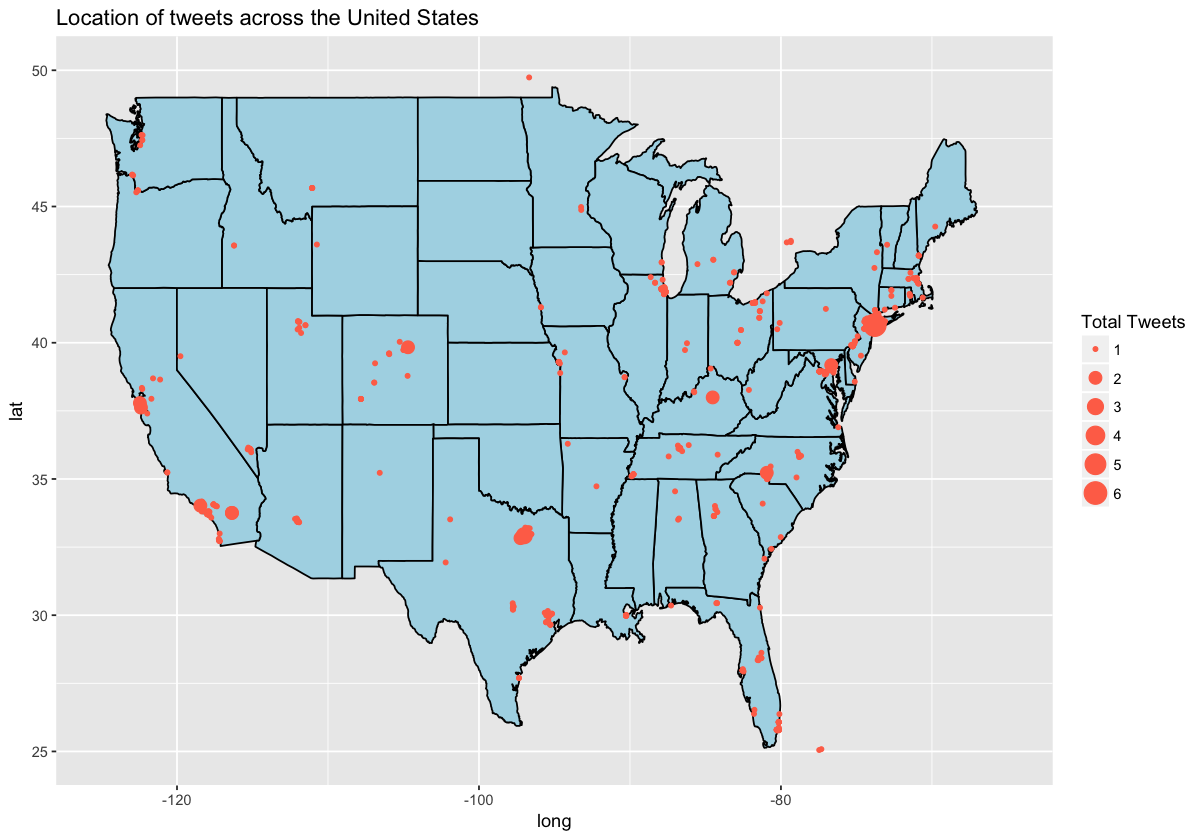

In [242]:
options(repr.plot.width = 10, repr.plot.height = 7)
require(maps)
states <- map_data("state")
ggplot()+
geom_polygon(data = states, aes(x = long, y = lat, group = group), colour="black", fill = 'lightblue')+ 
ggtitle("Location of tweets across the United States")+
geom_point(data = location_2, aes(x = long, y = lat, size = n), color="coral1") + scale_size(name="Total Tweets")+
xlim(-125, -65) + ylim(25, 50)

Among the States, the tweets are spread out but are more centered around the East Coast in the NYC region

In [4]:
glimpse(df)

Observations: 14,640
Variables: 15
$ tweet_id                     <dbl> 5.703061e+17, 5.703011e+17, 5.703011e+...
$ airline_sentiment            <chr> "neutral", "positive", "neutral", "neg...
$ airline_sentiment_confidence <dbl> 1.0000, 0.3486, 0.6837, 1.0000, 1.0000...
$ negativereason               <chr> NA, NA, NA, "Bad Flight", "Can't Tell"...
$ negativereason_confidence    <dbl> NA, 0.0000, NA, 0.7033, 1.0000, 0.6842...
$ airline                      <chr> "Virgin America", "Virgin America", "V...
$ airline_sentiment_gold       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ name                         <chr> "cairdin", "jnardino", "yvonnalynn", "...
$ negativereason_gold          <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ retweet_count                <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ text                         <chr> "@VirginAmerica What @dhepburn said.",...
$ tweet_coord                  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ tweet_created  